# 01_01: Warmup with Python loops

We will begin every video by importing the standard set of Python modules that we will need throughout this course. This cell does just that, so we execute it by selecting it with the cursor and pressing shift-return.

In [28]:
import math
import collections
import dataclasses
import datetime

# We load often-used modules using shorter aliases. np and pd are standard from numpy and pandas
import numpy as np
import pandas as pd

# We also import the simpler command-oriented interface to matplotlib, pyplot
import matplotlib.pyplot as pp  

If you've worked in programming before, you must be familiar with loops. They occur in many different computing problems, and they allow us to automate repetitive operations.

Loops are also a good topic to start our quick review of the Python core language, which will focus on the features that are most important to work with data.

So how exactly do loops work in Python?

We'll see them in a concrete example. Consider the _combinatorial_ problem of breaking a U.S. dollar into all possible combinations of coins: for instance, four quarters, two quarters and five 10-cent dimes, and so on.

The U.S. coins currently in use are \\$1, \\$0.50 (rare), \\$0.25, \\$0.10, \\$0.05, \\$0.01.

Now, if we have to add coins up to a dollar, we can use at most one \$1 coin, two 50-cent coins, four quarters, and so on, but also mix different 

In [1]:
# [slide 1]
# 1 (bill) = 1 (coin)
#            0.50 + 0.50,
#            0.25 + 0.25 + 0.25 + 0.25,
#            0.10 + 0.10 + 0.10 + 0.10 + 0.10,
#            ...
#            0.50 + 0.25 + 0.25
#            0.50 + 0.25 + 0.10 + 0.10 + 0.05
#            ...

You can already see how we're going to need several nested loops to figure out all the combinations!

To generate all possible ways to break up our dollar, let's start with a very simple-minded strategy. For each face value (such as one dollar, half a dollar, a quarter...), we enumerate all possible quantities: 0 to 1 \$1 coins, 0 to 2 half-dollar coins, 0 to 4 quarters, and so on. And then for each combination we check whether it adds up to a dollar.

Therefore, we need six nested loops... luckily it's Python that will keep track of them.

The basic structure of a loop in Python is "for variable in iterable", followed by the block of code that we are repeating, with the variable taking on the values provided by the iterable.

In [ ]:
# [slide 2]
# for i in [iterable]: 
#     [do something with i]
#
# [arrow to iterable: list, dict, set, ..., iterator, generator]

But what is an iterable? We can think of it as a black box that keeps providing new values until it runs out. A simple example is a Python container such as a list. Perhaps the most commonly used iterable is `range`, which provides integer values from a _start value_ to an _end value_, _exclusive_ of the end value. This means that `range(0,10)` counts from 0 to 9.

In [ ]:
# [add to slide 2]
# range([start], stop, [step])

In [5]:
for i in range(0, 10):
    print(i)

0
1
2
3
4
5
6
7
8
9


There are many reasons for this convention about the end value: for instance, by looking at the end value we see immediately the total number of elements in the range (in this case, 10). In the end, however, we just have to accept it as one of the building assumptions of the language.

`range` has a couple more interesting features: 1) if we omit the start value it is assumed to be zero; 2) we can provide a `step` argument to move through the range in increments larger than one. If we do provide the step, we must also specify the initial value to avoid confusion.

In [1]:
for i in range(5):
    print(i)

0
1
2
3
4


In [7]:
for i in range(0, 10, 2):
    print(i)

0
2
4
6
8


Let's go back to our dollar and build our nested loops: we need from 0 to 1 one-dollar coins, which means that the first `range` object will be `range(2)` (2 is excluded). To keep the maximum number of each coin in sight, let's write `range(1+1)`. We then proceed with the other coins, one loop for each. Each nested loop must be indented with respect to its parent, which I do with tab.

In [ ]:
for count_100 in range(1+1):
    for count_50 in range(2+1):
        for count_25 in range(5+1):
            for count_10 in range(10+1):
                for count_5 in range(20+1):
                    for count_1 in range(100+1):

Inside the innermost loop we will check whether the total amount is one dollar. If so, let's add the combination to a list, which we need to initialize as the empty list. (We will have a lot more to say about lists in the next video.) Let's try this out!

In [5]:
combinations = []

for count_100 in range(1+1):
    for count_50 in range(2+1):
        for count_25 in range(4+1):
            for count_10 in range(10+1):
                for count_5 in range(20+1):
                    for count_1 in range(100+1):
                        if 100*count_100 + 50*count_50 + 25*count_25 + 10*count_10 + 5*count_5 + count_1 == 100:
                            combinations.append([count_100, count_50, count_25, count_10, count_5, count_1])

Let's have a look:

In [6]:
combinations

[[0, 0, 0, 0, 0, 100],
 [0, 0, 0, 0, 1, 95],
 [0, 0, 0, 0, 2, 90],
 [0, 0, 0, 0, 3, 85],
 [0, 0, 0, 0, 4, 80],
 [0, 0, 0, 0, 5, 75],
 [0, 0, 0, 0, 6, 70],
 [0, 0, 0, 0, 7, 65],
 [0, 0, 0, 0, 8, 60],
 [0, 0, 0, 0, 9, 55],
 [0, 0, 0, 0, 10, 50],
 [0, 0, 0, 0, 11, 45],
 [0, 0, 0, 0, 12, 40],
 [0, 0, 0, 0, 13, 35],
 [0, 0, 0, 0, 14, 30],
 [0, 0, 0, 0, 15, 25],
 [0, 0, 0, 0, 16, 20],
 [0, 0, 0, 0, 17, 15],
 [0, 0, 0, 0, 18, 10],
 [0, 0, 0, 0, 19, 5],
 [0, 0, 0, 0, 20, 0],
 [0, 0, 0, 1, 0, 90],
 [0, 0, 0, 1, 1, 85],
 [0, 0, 0, 1, 2, 80],
 [0, 0, 0, 1, 3, 75],
 [0, 0, 0, 1, 4, 70],
 [0, 0, 0, 1, 5, 65],
 [0, 0, 0, 1, 6, 60],
 [0, 0, 0, 1, 7, 55],
 [0, 0, 0, 1, 8, 50],
 [0, 0, 0, 1, 9, 45],
 [0, 0, 0, 1, 10, 40],
 [0, 0, 0, 1, 11, 35],
 [0, 0, 0, 1, 12, 30],
 [0, 0, 0, 1, 13, 25],
 [0, 0, 0, 1, 14, 20],
 [0, 0, 0, 1, 15, 15],
 [0, 0, 0, 1, 16, 10],
 [0, 0, 0, 1, 17, 5],
 [0, 0, 0, 1, 18, 0],
 [0, 0, 0, 2, 0, 80],
 [0, 0, 0, 2, 1, 75],
 [0, 0, 0, 2, 2, 70],
 [0, 0, 0, 2, 3, 65],
 [0, 0, 0, 2, 4

The first few combinations seem to check out fine. It turns out there are 293 ways to get a dollar out of change.

In [9]:
len(combinations)

293

That's the solution to the problem we posed.

However, in data analysis it often happens that the solution raises a new question. For instance, how many ways to make _two_ dollars out of change? Or three? Does the number of combinations increase linearly or quadratically with the amount we're breaking up?

What we need to do is to take the code we wrote, and _generalize_ it to answer those questions, creating a function (we may call it `find_combinations`) that will take a dollar amount in cents, and return all possible ways to make it.

Before we do so, we make a couple of changes to our code to make it faster, and to make it easier to generalize. This is an example of _refactoring_.

The first change is that we will not loop by count, but _by value_, using the `step` argument of the range. For instance, instead of the loop

In [4]:
for count_25 in range(4+1):
    print(count_25)

0
1
2
3
4


we will write

In [3]:
for amount_25 in range(0, 100+1, 25):
    print(amount_25)

0
25
50
75
100


The second is to recognize that we don't actually need the innermost loop: as long as the total up to that point is less or equal than a dollar, we can always make up the difference with pennies. Therefore we write:

In [13]:
combinations_amounts = []

for amount_100 in range(0, 100+1, 100):
    for amount_50 in range(0, 100+1, 50):
        for amount_25 in range(0, 100+1, 25):
            for amount_10 in range(0, 100+1, 10):
                for amount_5 in range(0, 100+1, 5):
                    total_so_far = amount_100 + amount_50 + amount_25 + amount_10 + amount_5
                    
                    if total_so_far <= 100:
                        combinations_amounts.append([amount_100, amount_50, amount_25, amount_10, amount_5,
                                                     100 - total_so_far])

Looks alright.

In [14]:
combinations_amounts

[[0, 0, 0, 0, 0, 100],
 [0, 0, 0, 0, 5, 95],
 [0, 0, 0, 0, 10, 90],
 [0, 0, 0, 0, 15, 85],
 [0, 0, 0, 0, 20, 80],
 [0, 0, 0, 0, 25, 75],
 [0, 0, 0, 0, 30, 70],
 [0, 0, 0, 0, 35, 65],
 [0, 0, 0, 0, 40, 60],
 [0, 0, 0, 0, 45, 55],
 [0, 0, 0, 0, 50, 50],
 [0, 0, 0, 0, 55, 45],
 [0, 0, 0, 0, 60, 40],
 [0, 0, 0, 0, 65, 35],
 [0, 0, 0, 0, 70, 30],
 [0, 0, 0, 0, 75, 25],
 [0, 0, 0, 0, 80, 20],
 [0, 0, 0, 0, 85, 15],
 [0, 0, 0, 0, 90, 10],
 [0, 0, 0, 0, 95, 5],
 [0, 0, 0, 0, 100, 0],
 [0, 0, 0, 10, 0, 90],
 [0, 0, 0, 10, 5, 85],
 [0, 0, 0, 10, 10, 80],
 [0, 0, 0, 10, 15, 75],
 [0, 0, 0, 10, 20, 70],
 [0, 0, 0, 10, 25, 65],
 [0, 0, 0, 10, 30, 60],
 [0, 0, 0, 10, 35, 55],
 [0, 0, 0, 10, 40, 50],
 [0, 0, 0, 10, 45, 45],
 [0, 0, 0, 10, 50, 40],
 [0, 0, 0, 10, 55, 35],
 [0, 0, 0, 10, 60, 30],
 [0, 0, 0, 10, 65, 25],
 [0, 0, 0, 10, 70, 20],
 [0, 0, 0, 10, 75, 15],
 [0, 0, 0, 10, 80, 10],
 [0, 0, 0, 10, 85, 5],
 [0, 0, 0, 10, 90, 0],
 [0, 0, 0, 20, 0, 80],
 [0, 0, 0, 20, 5, 75],
 [0, 0, 0, 20, 10, 70

In [16]:
len(combinations_amounts) 

293

We are almost done! Now we can take our code and make it into the function `combinations` by replacing the value 100 everywhere with a variable argument. We also wrap our computation with `def` and `return` statements, so it becomes a function.

In [19]:
# [copy code from above]

def find_combinations(total):
    combinations_amounts = []

    for amount_100 in range(0, total+1, 100):
        for amount_50 in range(0, total+1, 50):
            for amount_25 in range(0, total+1, 25):
                for amount_10 in range(0, total+1, 10):
                    for amount_5 in range(0, total+1, 5):
                        total_so_far = amount_100 + amount_50 + amount_25 + amount_10 + amount_5

                        if total_so_far <= total:
                            combinations_amounts.append([amount_100, amount_50, amount_25, amount_10, amount_5,
                                                         total - total_so_far])
    
    return combinations_amounts

Here we go! Let's see how we can make 2 and 3 dollars.

In [21]:
len(find_combinations(200))

2728

In [22]:
len(find_combinations(300))

12318

You may be curious to know how fast this number grows. A matplotlib plot should give us an idea.

In [32]:
totals = range(100, 600, 100)
lengths = [len(find_combinations(total)) for total in totals]

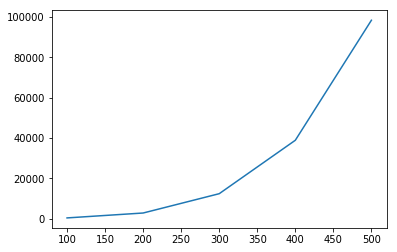

In [34]:
pp.plot(totals, lengths)

In fact, the number grows approximately as the fifth power of the total.